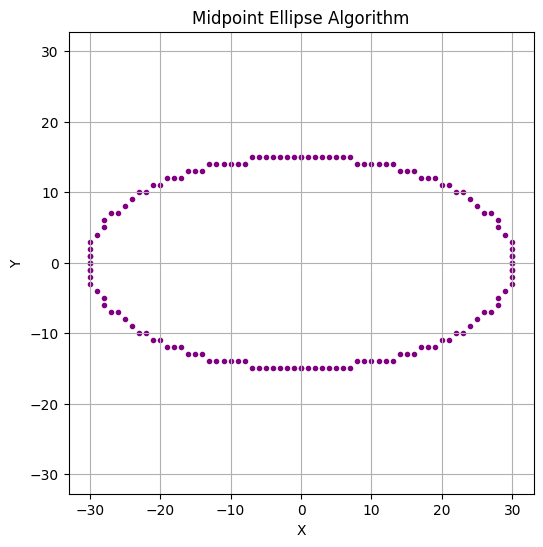

In [9]:
import matplotlib.pyplot as plt

def plot_ellipse_points(xc, yc, x, y, xes, yes):
    pts = [
        (x + xc, y + yc),
        (-x + xc, y + yc),
        (x + xc, -y + yc),
        (-x + xc, -y + yc),
    ]
    for px, py in pts:
        xes.append(px)
        yes.append(py)

def midpoint_ellipse(rx, ry, xc=0, yc=0):
    rx2 = rx * rx
    ry2 = ry * ry
    x = 0
    y = ry
    xes, yes = [], []

    # Region 1
    p1 = ry2 - (rx2 * ry) + 0.25 * rx2
    plot_ellipse_points(xc, yc, x, y, xes, yes)

    while 2 * ry2 * x <= 2 * rx2 * y:
        x += 1
        if p1 < 0:
            p1 += 2 * ry2 * x + ry2
        else:
            y -= 1
            p1 += 2 * ry2 * x - 2 * rx2 * y + ry2
        plot_ellipse_points(xc, yc, x, y, xes, yes)

    # Region 2
    p2 = (ry2 * (x + 0.5) ** 2) + (rx2 * (y - 1) ** 2) - (rx2 * ry2)

    while y >= 0:
        if p2 > 0:
            y -= 1
            p2 -= 2 * rx2 * y + rx2
        else:
            x += 1
            y -= 1
            p2 += 2 * ry2 * x - 2 * rx2 * y + rx2
        plot_ellipse_points(xc, yc, x, y, xes, yes)

    return xes, yes

def plot_midpoint_ellipse(rx, ry, xc=0, yc=0):
    xes, yes = midpoint_ellipse(rx, ry, xc, yc)
    plt.figure(figsize=(6, 6))
    plt.scatter(xes, yes, marker='.', color='purple')
    plt.title("Midpoint Ellipse Algorithm")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example
plot_midpoint_ellipse(30, 15, 0, 0)
